In [3]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("✅ تم تفعيل نمو الذاكرة على GPU")
else:
    print("⚠️ لا يوجد GPU متاح")


2025-06-28 07:51:51.466720: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-28 07:51:51.850628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-28 07:51:51.850770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-28 07:51:51.998271: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-28 07:51:52.152034: I tensorflow/core/platform/cpu_feature_gua

✅ تم تفعيل نمو الذاكرة على GPU


2025-06-28 07:52:05.493092: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-28 07:52:06.523055: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-28 07:52:06.523221: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
# 🧪 QR Code لأول عرض (عرض 60 شيكل)

qr_data = "https://www.facebook.com/share/1Bozi5W8am/"  # عدّل الرابط إذا عندك رابط مخصص للطلب
qr = qrcode.QRCode(
    version=5,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4
)
qr.add_data(qr_data)
qr.make(fit=True)

qr_img = qr.make_image(fill_color="black", back_color="white").convert("RGB")

# تحويل إلى NumPy لإضافة لمسة OpenCV (إطار فضي مثلاً)
qr_np = np.array(qr_img)
border_color = (192, 192, 192)
qr_with_border = cv2.copyMakeBorder(qr_np, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=border_color)

# لوحة نهائية مع نص عربي تحت الكود
final_img = Image.new("RGB", (qr_with_border.shape[1], qr_with_border.shape[0]+70), "white")
final_img.paste(Image.fromarray(qr_with_border), (0, 0))

draw = ImageDraw.Draw(final_img)
text = "عرض الـ60 شيكل 🍕"
font = ImageFont.load_default()
text_w, text_h = draw.textsize(text, font)
text_x = (final_img.width - text_w) // 2
text_y = qr_with_border.shape[0] + 20
draw.text((text_x, text_y), text, fill="black", font=font)

# حفظ الكود
qr_path = os.path.join(qr_dir, "pizza_offer_60QR.png")
final_img.save(qr_path)

final_img.show()
print(f"✅ تم حفظ الكود في: {qr_path}")


AttributeError: 'ImageDraw' object has no attribute 'textsize'

In [5]:
 html_dir = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/html_exports"
os.makedirs(html_dir, exist_ok=True)

html_path = os.path.join(html_dir, "index.html")

html_content = f"""
<!DOCTYPE html>
<html lang="ar" dir="rtl">
<head>
    <meta charset="UTF-8">
    <title>عرض الحجم العائلي 🍕</title>
    <style>
        body {{
            background: linear-gradient(#fffaf0, #ffe5b4);
            font-family: sans-serif;
            padding: 2rem;
            color: #222;
            text-align: center;
        }}
        h1 {{
            color: #b30000;
            font-size: 2.5em;
        }}
        .price {{
            font-size: 2em;
            color: #222;
            margin: 1rem 0;
        }}
        .offer {{
            font-size: 1.2em;
            margin-bottom: 2rem;
        }}
        .btn {{
            padding: 1rem 2rem;
            background-color: #ff4500;
            color: white;
            border: none;
            border-radius: 10px;
            font-size: 1.2em;
            cursor: pointer;
            text-decoration: none;
        }}
        .footer {{
            margin-top: 3rem;
            font-size: 0.9em;
            color: #777;
        }}
    </style>
</head>
<body>
    <h1>عرض الحجم العائلي!</h1>
    <p class="price">60 شيكل فقط 🍕</p>
    <p class="offer">بيتزا XL + بطاطا كبيرة + كولا 1.25L</p>
    <a class="btn" href="#">اطلب الآن</a>
    <div class="footer">
        بلعين – كفر نعمة – صفا | توصيل مجاني 🚚
    </div>
</body>
</html>
"""

with open(html_path, "w", encoding="utf-8") as file:
    file.write(html_content)

print(f"✅ تم إنشاء صفحة العرض في: {html_path}")


✅ تم إنشاء صفحة العرض في: /home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/html_exports/index.html


In [6]:
from PIL import Image, ImageDraw, ImageFont
import os

# ⚙️ إعداد المسار
visuals_dir = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/visuals"
os.makedirs(visuals_dir, exist_ok=True)
poster_path = os.path.join(visuals_dir, "promo_offer_60shekel.png")

# 🖼️ إعداد الصورة
width, height = 1200, 675  # عرضي (16:9)
bg_color = (255, 248, 220)  # لون عجينة فاتح
img = Image.new("RGB", (width, height), bg_color)
draw = ImageDraw.Draw(img)

# ✍️ معلومات العرض
title = "عرض الحجم العائلي!"
price = "60 شيكل فقط 🍕"
details = "بيتزا XL + بطاطا كبيرة + كولا 1.25L"
contact = "📞 056-978-8731 | 📍 بلعين - شارع صفا - رام الله"

# 🅰️ إعداد الخطوط
font_title = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 64)
font_price = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 48)
font_text = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 36)

# 📌 رسم النصوص
draw.text((width//2, 60), title, font=font_title, fill=(178, 34, 34), anchor="mm")
draw.text((width//2, 160), price, font=font_price, fill="black", anchor="mm")
draw.text((width//2, 240), details, font=font_text, fill="black", anchor="mm")
draw.text((width//2, height - 80), contact, font=font_text, fill=(60, 60, 60), anchor="mm")

# 💾 الحفظ والعرض
img.save(poster_path)
img.show()
print(f"✅ تم حفظ بوستر العرض في: {poster_path}")


✅ تم حفظ بوستر العرض في: /home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/visuals/promo_offer_60shekel.png
Opening in existing browser session.


In [7]:
import os

# مسار المجلد الذي سنضع فيه الصور
assets_dir = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/images"

# إنشاء المجلد (والمجلدات العليا إن لم تكن موجودة)
os.makedirs(assets_dir, exist_ok=True)

print(f"✅ تم إنشاء المجلد: {assets_dir}")


✅ تم إنشاء المجلد: /home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/images


In [8]:
import os

# مسار مجلد الصور غير المعالجة (الخام)
raw_dir = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/raw_images"

# إنشاء المجلد (لو مش موجود)
os.makedirs(raw_dir, exist_ok=True)

print(f"✅ تم إنشاء مجلد الصور غير المعالجة في: {raw_dir}")


✅ تم إنشاء مجلد الصور غير المعالجة في: /home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/raw_images


In [9]:
rm "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/html_exports/index.html"


In [10]:
html_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/promo_offer.html"
html_code = """\
<!DOCTYPE html>
<html lang="ar" dir="rtl">
<head>
  <meta charset="UTF-8" />
  <title>عرض الحجم العائلي 🍕</title>
  <link href="https://fonts.googleapis.com/css2?family=Tajawal:wght@400;700;900&display=swap" rel="stylesheet">
  <style>
    body {
      margin: 0;
      font-family: 'Tajawal', sans-serif;
      color: #fff;
      background: url('assets/images/wood_leaf_bg.jpg') no-repeat center center fixed;
      background-size: cover;
    }
    .overlay {
      background-color: rgba(0,0,0,0.65);
      min-height: 100vh;
      padding: 40px;
      box-sizing: border-box;
    }
    h1 {
      font-size: 3em;
      margin-bottom: 10px;
      color: #ffd700;
      text-align: center;
    }
    .promo {
      display: flex;
      flex-wrap: wrap;
      justify-content: center;
      gap: 20px;
      margin: 40px 0;
    }
    .promo img {
      max-width: 300px;
      border-radius: 8px;
      box-shadow: 0 0 10px #222;
    }
    .details {
      text-align: center;
      font-size: 1.3em;
      line-height: 2em;
    }
    .price {
      font-size: 2em;
      color: #00e676;
      font-weight: bold;
    }
    .contact {
      margin-top: 40px;
      text-align: center;
      font-size: 1.1em;
    }
    .whatsapp {
      color: #25d366;
      font-weight: bold;
      text-decoration: none;
    }
    .footer {
      margin-top: 40px;
      text-align: center;
      font-size: 0.9em;
      color: #aaa;
    }
    @media (max-width: 768px) {
      h1 { font-size: 2em; }
      .promo img { max-width: 90%; }
    }
  </style>
</head>
<body>
  <div class="overlay">
    <h1>🔥 عرض الحجم العائلي!</h1>
    <div class="promo">
      <img src="assets/images/pizza_closeup_main.png" alt="بيتزا مقرّبة">
      <img src="assets/images/pizza_deluxe_plate.jpg" alt="بيتزا ديلوكس">
      <img src="assets/images/french_fries_main.jpg" alt="بطاطا مقرمشة">
      <img src="assets/images/coke_glass_ice.png" alt="كولا باردة">
    </div>
    <div class="details">
      🍕 بيتزا XL  
      + 🍟 بطاطا كبيرة  
      + 🥤 كولا 1.25L  
      <div class="price">فقط بـ 60 شيكل!</div>
      <div style="color:#ccc;">(حوالي 16.6 دولار أمريكي)</div>
    </div>
    <div class="contact">
      📞 للحجز أو الطلب: <span dir="ltr">00972569787731</span><br>
      💬 عبر الواتساب:  
      <a href="https://wa.me/972569787731" class="whatsapp" target="_blank">اضغط هنا</a><br>
      🏠 العنوان: بلعين – شارع صفا – رام الله
    </div>
    <div class="footer">
      &copy; 2025 Mr. Pizza Hut – All Rights Reserved
    </div>
  </div>
</body>
</html>
"""

with open(html_path, "w", encoding="utf-8") as f:
    f.write(html_code)

print("✅ تم إنشاء الصفحة: promo_offer.html بنجاح!")


✅ تم إنشاء الصفحة: promo_offer.html بنجاح!


In [11]:
import qrcode
from PIL import Image

# رابط فيسبوك
url = "https://www.facebook.com/profile.php?id=61574045938687"

# توليد QR مع تصحيح خطأ عالي
qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_H)
qr.add_data(url)
qr.make()
qr_img = qr.make_image(fill_color="black", back_color="white").convert("RGB")

# فتح الشعار
logo_path = "assets/brand/logo_pizzahot_chefstyle.png"
logo = Image.open(logo_path)

# حساب الحجم المناسب
qr_width, qr_height = qr_img.size
logo_size = qr_width // 4  # الشعار ربع حجم QR
logo = logo.resize((logo_size, logo_size), Image.LANCZOS)

# لصق الشعار في المنتصف
pos = ((qr_width - logo_size) // 2, (qr_height - logo_size) // 2)
qr_img.paste(logo, pos, mask=logo if logo.mode == "RGBA" else None)

# حفظ الصورة
output_path = "assets/qrcodes/qr_facebook_pizzahot.png"
qr_img.save(output_path)
print("✅ باركود محفوظ في:", output_path)


FileNotFoundError: [Errno 2] No such file or directory: 'assets/brand/logo_pizzahot_chefstyle.png'

In [12]:
import qrcode
from PIL import Image

# 💬 رابط صفحة فيسبوك
url = "https://www.facebook.com/profile.php?id=61574045938687"

# 🧱 إعداد رمز QR مع تصحيح خطأ عالي ليسمح بإدراج شعار في المنتصف
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)
qr.add_data(url)
qr.make(fit=True)

# 🎨 إنشاء صورة رمز QR
qr_img = qr.make_image(fill_color="black", back_color="white").convert('RGB')

# 📌 مسار الشعار الكامل
logo_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_pizzahot_chefstyle.png"
logo = Image.open(logo_path)

# 📐 تغيير حجم الشعار ليتناسب مع منتصف الرمز
qr_width, qr_height = qr_img.size
logo_size = qr_width // 4
logo = logo.resize((logo_size, logo_size), Image.LANCZOS)

# 📍 إدراج الشعار في منتصف رمز QR
pos = ((qr_width - logo_size) // 2, (qr_height - logo_size) // 2)
qr_img.paste(logo, pos, mask=logo if logo.mode == 'RGBA' else None)

# 💾 حفظ الصورة في المسار المناسب
output_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot.png"
qr_img.save(output_path)

print("✅ تم توليد رمز QR وحفظه في:", output_path)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot.png'

In [13]:
import qrcode
from PIL import Image

# 💬 رابط صفحة فيسبوك
url = "https://www.facebook.com/profile.php?id=61574045938687"

# 🧱 إعداد رمز QR مع تصحيح خطأ عالي ليسمح بإدراج شعار في المنتصف
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)
qr.add_data(url)
qr.make(fit=True)

# 🎨 إنشاء صورة رمز QR
qr_img = qr.make_image(fill_color="black", back_color="white").convert('RGB')

# 📌 مسار الشعار الكامل
logo_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_pizzahot_chefstyle.png"
logo = Image.open(logo_path)

# 📐 تغيير حجم الشعار ليتناسب مع منتصف الرمز
qr_width, qr_height = qr_img.size
logo_size = qr_width // 4
logo = logo.resize((logo_size, logo_size), Image.LANCZOS)

# 📍 إدراج الشعار في منتصف رمز QR
pos = ((qr_width - logo_size) // 2, (qr_height - logo_size) // 2)
qr_img.paste(logo, pos, mask=logo if logo.mode == 'RGBA' else None)

# 💾 حفظ الصورة في المسار المناسب
output_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot.png"
qr_img.save(output_path)

print("✅ تم توليد رمز QR وحفظه في:", output_path)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot.png'

In [14]:
/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot.png


SyntaxError: invalid decimal literal (896614874.py, line 1)

In [15]:
import qrcode
from PIL import Image
import os

# 🟩 إعداد الرابط
url = "https://www.facebook.com/profile.php?id=61574045938687"

# 🛠️ إعداد رمز QR
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,  # يسمح بإدراج شعار في المنتصف
    box_size=10,
    border=4,
)
qr.add_data(url)
qr.make(fit=True)
qr_img = qr.make_image(fill_color="black", back_color="white").convert('RGB')

# 🖼️ تحميل الشعار
logo_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_pizzahot_chefstyle.png"
logo = Image.open(logo_path)

# 🧯 تعديل حجم الشعار ليلائم منتصف QR
qr_width, qr_height = qr_img.size
logo_size = qr_width // 4
logo = logo.resize((logo_size, logo_size), Image.LANCZOS)

# 🔲 لصق الشعار في منتصف الرمز
pos = ((qr_width - logo_size) // 2, (qr_height - logo_size) // 2)
qr_img.paste(logo, pos, mask=logo if logo.mode == 'RGBA' else None)

# 📂 التأكد من وجود مجلد الحفظ
output_dir = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/"
os.makedirs(output_dir, exist_ok=True)

# 💾 حفظ الصورة
output_path = os.path.join(output_dir, "qr_facebook_pizzahot.png")
qr_img.save(output_path)

print("✅ تم حفظ رمز QR في:", output_path)


✅ تم حفظ رمز QR في: /home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot.png


In [16]:
<!DOCTYPE html>
<html lang="ar" dir="rtl">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>PIZZA HOT</title>
  <style>
    body {
      margin: 0;
      font-family: 'Tahoma', sans-serif;
      background: #fff9f4;
      color: #333;
      text-align: center;
    }
    header {
      background-color: #c21807;
      padding: 20px;
    }
    header img {
      max-width: 180px;
    }
    h1 {
      margin: 20px 0 10px;
      font-size: 2.2em;
      color: #c21807;
    }
    .buttons {
      margin: 20px;
    }
    .buttons a {
      display: inline-block;
      margin: 10px;
      padding: 12px 20px;
      border-radius: 6px;
      text-decoration: none;
      font-weight: bold;
      color: white;
      transition: 0.3s ease;
    }
    .whatsapp {
      background-color: #25D366;
    }
    .facebook {
      background-color: #4267B2;
    }
    .whatsapp:hover { background-color: #1ebe5e; }
    .facebook:hover { background-color: #375a9c; }

    .campaign-link {
      background-color: #ff9800;
      display: inline-block;
      margin-top: 30px;
      padding: 14px 24px;
      color: #fff;
      font-weight: bold;
      border-radius: 8px;
      text-decoration: none;
      font-size: 1.2em;
    }
    .campaign-link:hover {
      background-color: #e68900;
    }

    .qr-section img {
      margin-top: 20px;
      max-width: 220px;
    }
  </style>
</head>
<body>

  <header>
    <img src="assets/brand/logo_pizzahot_chefstyle.png" alt="PIZZA HOT Logo" />
  </header>

  <h1>مرحباً بك في PIZZA HOT!</h1>
  <p>نكهات تلهب الحواس... وعروض تشعل الشهية 🔥🍕</p>

  <div class="buttons">
    <a class="whatsapp" href="https://wa.me/972592000000" target="_blank">📱 اطلب عبر واتساب</a>
    <a class="facebook" href="https://www.facebook.com/profile.php?id=61574045938687" target="_blank">📘 تابعنا على فيسبوك</a>
  </div>

  <div class="qr-section">
    <p>امسح الرمز وابدأ الطلب فوراً:</p>
    <img src="assets/qrcodes/qr_facebook_pizzahot.png" alt="QR Facebook">
  </div>

  <a href="promo_offer.html" class="campaign-link">🎯 شاهد عرض الحجم العائلي الآن</a>

</body>
</html>


SyntaxError: invalid decimal literal (1543505448.py, line 17)

In [17]:
<!DOCTYPE html>
<html lang="ar" dir="rtl">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>PIZZA HOT</title>
  <style>
    body {
      margin: 0;
      font-family: 'Tahoma', sans-serif;
      background: #fff9f4;
      color: #333;
      text-align: center;
    }
    header {
      background-color: #c21807;
      padding: 20px;
    }
    header img {
      max-width: 180px;
    }
    h1 {
      margin: 20px 0 10px;
      font-size: 2.2em;
      color: #c21807;
    }
    .buttons {
      margin: 20px;
    }
    .buttons a {
      display: inline-block;
      margin: 10px;
      padding: 12px 20px;
      border-radius: 6px;
      text-decoration: none;
      font-weight: bold;
      color: white;
      transition: 0.3s ease;
    }
    .whatsapp { background-color: #25D366; }
    .facebook { background-color: #4267B2; }
    .whatsapp:hover { background-color: #1ebe5e; }
    .facebook:hover { background-color: #375a9c; }

    .campaign-link {
      background-color: #ff9800;
      display: inline-block;
      margin-top: 30px;
      padding: 14px 24px;
      color: #fff;
      font-weight: bold;
      border-radius: 8px;
      text-decoration: none;
      font-size: 1.2em;
    }
    .campaign-link:hover {
      background-color: #e68900;
    }

    .qr-section img {
      margin-top: 20px;
      max-width: 220px;
    }
  </style>
</head>
<body>

  <header>
    <img src="assets/brand/logo_pizzahot_chefstyle.png" alt="PIZZA HOT Logo" />
  </header>

  <h1>مرحباً بك في PIZZA HOT!</h1>
  <p>نكهات تلهب الحواس... وعروض تشعل الشهية 🔥🍕</p>

  <div class="buttons">
    <a class="whatsapp" href="https://wa.me/972592000000" target="_blank">📱 اطلب عبر واتساب</a>
    <a class="facebook" href="https://www.facebook.com/profile.php?id=61574045938687" target="_blank">📘 تابعنا على فيسبوك</a>
  </div>

  <div class="qr-section">
    <p>امسح الرمز وابدأ الطلب فوراً:</p>
    <img src="assets/qrcodes/qr_facebook_pizzahot.png" alt="QR Facebook">
  </div>

  <a href="promo_offer.html" class="campaign-link">🎯 شاهد عرض الحجم العائلي الآن</a>

</body>
</html>


SyntaxError: invalid decimal literal (3977219028.py, line 17)

In [18]:
<!DOCTYPE html>
<html lang="ar" dir="rtl">
<head>
  <meta charset="UTF-8">
  <title>تحليل شركة Pbrands</title>
  <style>
    body {
      font-family: 'Tahoma', sans-serif;
      background-color: #f8f9fa;
      color: #333;
      padding: 30px;
      line-height: 1.7;
    }
    h1 {
      text-align: center;
      color: #0d6efd;
    }
    h2 {
      margin-top: 40px;
      color: #198754;
    }
    .section {
      background: #ffffff;
      border: 1px solid #ddd;
      border-radius: 10px;
      padding: 20px;
      margin-top: 20px;
    }
    ul {
      padding-right: 20px;
    }
    a {
      color: #0d6efd;
      text-decoration: none;
    }
    a:hover {
      text-decoration: underline;
    }
    footer {
      text-align: center;
      margin-top: 50px;
      font-size: 0.9em;
      color: #777;
    }
  </style>
</head>
<body>

  <h1>تحليل تسويقي: شركة Pbrands for Marketing Solutions</h1>

  <div class="section">
    <h2>📌 معلومات عامة</h2>
    <p><strong>الاسم الكامل:</strong> Pbrands for Marketing Solutions</p>
    <p><strong>الموقع الإلكتروني:</strong> <a href="https://pbrands.ps" target="_blank">pbrands.ps</a></p>
    <p><strong>مواقع التواصل:</strong> <a href="https://www.facebook.com/pbrands.marketing/" target="_blank">صفحتهم على فيسبوك</a></p>
    <p><strong>الموقع الجغرافي:</strong> القدس - رام الله - جنين، فلسطين</p>
    <p><strong>رقم الهاتف:</strong> +972 54-313-7449</p>
    <p><strong>البريد الإلكتروني:</strong> pbrands2023@gmail.com</p>
  </div>

  <div class="section">
    <h2>🎨 الهوية البصرية</h2>
    <ul>
      <li>شعار بسيط واحترافي يركز على الحرف "P"</li>
      <li>الألوان: الأزرق، الأبيض، الأسود</li>
      <li>الخطوط: واضحة وعصرية</li>
      <li>الطابع العام: شبابي – ديناميكي – رقمي</li>
    </ul>
  </div>

  <div class="section">
    <h2>🛠️ الخدمات المقدمة</h2>
    <ul>
      <li>إدارة حسابات التواصل الاجتماعي</li>
      <li>كتابة محتوى تسويقي احترافي</li>
      <li>تصميم جرافيكي مميز</li>
      <li>تصوير منتجات وفيديوهات قصيرة</li>
      <li>تنفيذ حملات ممولة وتحليل النتائج</li>
      <li>تسويق عبر الهاتف</li>
      <li>تصميم هوية بصرية متكاملة</li>
    </ul>
  </div>

  <div class="section">
    <h2>🎯 الفئة المستهدفة</h2>
    <ul>
      <li>الشركات الصغيرة والمتوسطة</li>
      <li>المطاعم والكافيهات</li>
      <li>المتاجر الإلكترونية</li>
      <li>المشاريع الناشئة</li>
    </ul>
  </div>

  <div class="section">
    <h2>📣 أساليب التسويق</h2>
    <ul>
      <li>منشورات جذابة على فيسبوك وإنستغرام</li>
      <li>ريلز احترافية وتصوير منتجات</li>
      <li>قصص تفاعلية واستطلاعات</li>
      <li>محتوى تعليمي مثل نصائح تسويق ومقولات ملهمة</li>
      <li>ربط المحتوى بمنصات ذكية مثل campsite</li>
    </ul>
  </div>

  <footer>
    إعداد: الطالب علي — الفصل: 💼 التسويق الرقمي 2025
  </footer>

</body>
</html>


SyntaxError: invalid decimal literal (2069203201.py, line 11)

In [19]:
html_code = """
<!DOCTYPE html>
<html lang="ar" dir="rtl">
<head>
  <meta charset="UTF-8">
  <title>تحليل شركة Pbrands</title>
  <style>
    body {
      font-family: 'Tahoma', sans-serif;
      background-color: #f8f9fa;
      color: #333;
      padding: 30px;
      line-height: 1.7;
    }
    h1 {
      text-align: center;
      color: #0d6efd;
    }
    h2 {
      margin-top: 40px;
      color: #198754;
    }
    .section {
      background: #ffffff;
      border: 1px solid #ddd;
      border-radius: 10px;
      padding: 20px;
      margin-top: 20px;
    }
    ul {
      padding-right: 20px;
    }
    footer {
      text-align: center;
      margin-top: 50px;
      font-size: 0.9em;
      color: #777;
    }
  </style>
</head>
<body>

  <h1>تحليل تسويقي: شركة Pbrands for Marketing Solutions</h1>

  <div class="section">
    <h2>📌 معلومات عامة</h2>
    <p><strong>الاسم الكامل:</strong> Pbrands for Marketing Solutions</p>
    <p><strong>الموقع الإلكتروني:</strong> <a href="https://pbrands.ps" target="_blank">pbrands.ps</a></p>
    <p><strong>فيسبوك:</strong> <a href="https://www.facebook.com/pbrands.marketing/" target="_blank">pbrands.marketing</a></p>
    <p><strong>العنوان:</strong> القدس - رام الله - جنين، فلسطين</p>
    <p><strong>هاتف:</strong> +972 54-313-7449</p>
    <p><strong>إيميل:</strong> pbrands2023@gmail.com</p>
  </div>

  <div class="section">
    <h2>🎨 الهوية البصرية</h2>
    <ul>
      <li>شعار احترافي بسيط</li>
      <li>ألوان: أزرق، أبيض، أسود</li>
      <li>خطوط رسمية وعصرية</li>
      <li>طابع شبابي رقمي</li>
    </ul>
  </div>

  <div class="section">
    <h2>🛠️ الخدمات</h2>
    <ul>
      <li>إدارة محتوى سوشال ميديا</li>
      <li>تصميم جرافيكي وكتابة محتوى</li>
      <li>تصوير منتجات وفيديوهات</li>
      <li>تسويق عبر الهاتف</li>
      <li>بناء الهوية البصرية</li>
    </ul>
  </div>

  <div class="section">
    <h2>🎯 الفئة المستهدفة</h2>
    <ul>
      <li>الشركات الصغيرة والمتوسطة</li>
      <li>المتاجر الإلكترونية</li>
      <li>المطاعم والمشاريع الناشئة</li>
    </ul>
  </div>

  <div class="section">
    <h2>📣 وسائل التسويق</h2>
    <ul>
      <li>منشورات جذابة وفيديوهات ريلز</li>
      <li>قصص تفاعلية على فيسبوك وإنستغرام</li>
      <li>إعلانات ممولة ورسائل تسويقية</li>
      <li>محتوى توعوي وتعليمي</li>
    </ul>
  </div>

  <footer>
    إعداد الطالب علي • التسويق الرقمي • صيف 2025
  </footer>

</body>
</html>
"""

with open("pbrands_report.html", "w", encoding="utf-8") as f:
    f.write(html_code)

print("✅ تم إنشاء صفحة HTML بنجاح! اسم الملف: pbrands_report.html")


✅ تم إنشاء صفحة HTML بنجاح! اسم الملف: pbrands_report.html


In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = """
إدارة محتوى تصميم جرافيكي تسويق رقمي فيديوهات ريلز منشورات تفاعلية هوية بصرية محتوى احترافي
تسويق عبر الهاتف كتابة محتوى تصوير منتجات audience engagement branding
"""

wordcloud = WordCloud(font_path='arial', background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("سحابة كلمات من محتوى Pbrands")
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [21]:
import webbrowser
webbrowser.open("pbrands_report.html")



True

Opening in existing browser session.


In [22]:
html_code = """
<!DOCTYPE html>
<html lang="ar" dir="rtl">
<head>
  <meta charset="UTF-8">
  <title>تحليل شركة Pbrands</title>
  <style>
    body {
      font-family: 'Tahoma', sans-serif;
      background-color: #f4f6f9;
      color: #333;
      padding: 30px;
      line-height: 1.7;
    }
    h1 {
      text-align: center;
      color: #0d6efd;
    }
    h2 {
      margin-top: 40px;
      color: #198754;
    }
    .section {
      background: #ffffff;
      border: 1px solid #ddd;
      border-radius: 10px;
      padding: 20px;
      margin-top: 20px;
    }
    ul {
      padding-right: 20px;
    }
    footer {
      text-align: center;
      margin-top: 50px;
      font-size: 0.9em;
      color: #777;
    }
  </style>
</head>
<body>

  <h1>تحليل تسويقي شامل: Pbrands for Marketing Solutions</h1>

  <div class="section">
    <h2>📌 لماذا اخترتها؟</h2>
    <p>اخترت شركة Pbrands لأنها تمثل نموذجًا واقعيًا وحديثًا لشركات التسويق الرقمي في فلسطين. طريقة عرضها لخدماتها تُظهر فهمًا للسوق المحلي، وقدرتها على الدمج بين الإبداع والبساطة في التواصل مع العملاء.</p>
  </div>

  <div class="section">
    <h2>🎨 الهوية البصرية</h2>
    <ul>
      <li>شعار بسيط واحترافي يتضمن غالبًا الحرف "P"</li>
      <li>ألوان متناسقة: أزرق، أبيض، أسود</li>
      <li>طابع عصري يعكس جمهورًا شابًا وشركات ناشئة</li>
      <li>الخط المستخدم واضح وسهل القراءة على الشاشات</li>
    </ul>
  </div>

  <div class="section">
    <h2>🧠 تحليل طريقة العرض</h2>
    <ul>
      <li>لا يوجد كتالوج PDF تقليدي</li>
      <li>يعتمدون على منصة روابط ذكية <a href="https://campsite.to/pbrands" target="_blank">campsite.to</a></li>
      <li>لا يعرضون الأسعار علنًا، مما يخلق تشويقًا ومساحة للتفاوض</li>
      <li>يستخدمون الريلز والترندات بطريقة مبتكرة وغير تقليدية</li>
    </ul>
  </div>

  <div class="section">
    <h2>📣 وسائل التسويق</h2>
    <ul>
      <li>تصميم محتوى جذاب: فيديوهات قصيرة، منشورات بصريّة</li>
      <li>قصص تفاعلية على فيسبوك وإنستغرام</li>
      <li>محتوى توعوي وتعليمي</li>
      <li>إعلانات ممولة تستهدف شرائح مختلفة</li>
    </ul>
  </div>

  <div class="section">
    <h2>🎯 خلاصة</h2>
    <p>شركة Pbrands تقدم هوية رقمية احترافية بدون طرق تقليدية. أسلوبها قائم على التفاعل، التشويق، والتفكير خارج الصندوق. وهذا يجعلها نموذجًا ممتازًا للتحليل التسويقي الحديث.</p>
  </div>

  <footer>
    إعداد الطالب علي • التسويق الرقمي • صيف 2025
  </footer>

</body>
</html>
"""

with open("pbrands_report.html", "w", encoding="utf-8") as f:
    f.write(html_code)

print("✅ تم إنشاء الصفحة الجديدة بنجاح باسم: pbrands_report.html")


✅ تم إنشاء الصفحة الجديدة بنجاح باسم: pbrands_report.html


In [23]:
<!DOCTYPE html>
<html lang="ar" dir="rtl">
<head>
  <meta charset="UTF-8">
  <title>تحليل صفحة Pbrands على فيسبوك</title>
  <style>
    body {
      font-family: 'Tahoma', sans-serif;
      background-color: #f5f7fa;
      color: #333;
      line-height: 1.8;
      padding: 30px;
    }
    h1 {
      text-align: center;
      color: #0d6efd;
    }
    h2 {
      color: #198754;
      margin-top: 40px;
    }
    .section {
      background: white;
      border-radius: 10px;
      border: 1px solid #ddd;
      padding: 20px;
      margin-top: 20px;
    }
    ul {
      padding-right: 20px;
    }
    a {
      color: #0d6efd;
    }
    footer {
      text-align: center;
      margin-top: 50px;
      color: #777;
      font-size: 0.9em;
    }
  </style>
</head>
<body>

  <h1>تحليل صفحة Pbrands على فيسبوك</h1>

  <div class="section">
    <h2>📍 معلومات الصفحة</h2>
    <p><strong>الاسم:</strong> Pbrands for Marketing Solutions</p>
    <p><strong>الرابط:</strong> <a href="https://www.facebook.com/pbrands.marketing" target="_blank">facebook.com/pbrands.marketing</a></p>
    <p><strong>الموقع الجغرافي:</strong> القدس – رام الله – جنين، فلسطين</p>
    <p><strong>رقم المتابعين:</strong> حوالي 1.3 ألف</p>
  </div>

  <div class="section">
    <h2>🎨 الهوية البصرية</h2>
    <ul>
      <li>ألوان موحدة (أزرق، أبيض، رمادي)، تعطي طابع احترافي وحديث</li>
      <li>شعار بسيط يعكس الحرف "P" والتخصص بالتسويق</li>
      <li>تصاميم المواضيع متناسقة وتحمل نفس النمط</li>
    </ul>
  </div>

  <div class="section">
    <h2>📣 نوعية المحتوى</h2>
    <ul>
      <li>منشورات تسويقية موجهة للشركات الصغيرة والمشاريع الناشئة</li>
      <li>استخدام أسلوب ترندي (مثل ريلز، صيحات "من وينلي")</li>
      <li>محتوى تعليمي توعوي (نصائح في التسويق)</li>
      <li>مقاطع فيديو قصيرة وجاذبة</li>
    </ul>
  </div>

  <div class="section">
    <h2>📊 التفاعل</h2>
    <ul>
      <li>تفاعل جيّد على المنشورات من حيث اللايكات والتعليقات</li>
      <li>استخدام القصص (Stories) بشكل متكرر لزيادة التفاعل</li>
      <li>لا توجد بيانات دقيقة عن حملات ممولة، لكن يظهر التفاعل نشطًا على بعض المنشورات الممولة</li>
    </ul>
  </div>

  <div class="section">
    <h2>🧠 الملاحظات العامة</h2>
    <ul>
      <li>لا يتم عرض كتالوج أسعار علنيًا، بل يتم التواصل المباشر مع العميل</li>
      <li>توجد لمسة إبداعية في المحتوى وتصوير المنتجات</li>
      <li>الشركة تتبع أسلوب التشويق وعدم الإفصاح الكامل عن تفاصيل الخدمة</li>
    </ul>
  </div>

  <footer>
    إعداد: الطالب علي – التحليل الرقمي – صيف 2025
  </footer>

</body>
</html>


SyntaxError: invalid decimal literal (1466336137.py, line 12)

In [24]:
import requests

# بيانات ضرورية
page_id = "YOUR_PAGE_ID"  # معرف صفحة فيسبوك
access_token = "YOUR_ACCESS_TOKEN"  # التوكن من فيسبوك

# الرابط لاستدعاء منشورات الصفحة
url = f"https://graph.facebook.com/v18.0/{page_id}/posts?access_token={access_token}"

# جلب البيانات
response = requests.get(url)
data = response.json()

# عرض أول 5 منشورات
for post in data.get("data", [])[:5]:
    print("🔹 ID:", post.get("id"))
    print("📅 Created:", post.get("created_time"))
    print("📝 Message:", post.get("message", "لا يوجد محتوى"))
    print("-" * 40)


In [25]:
import requests
import pandas as pd

# بيانات الدخول
access_token = 'ضع_هنا_رمز_التوكن_الخاص_بك'
page_id = 'ضع_هنا_معرف_الصفحة_Page_ID'

# رابط API لجلب المنشورات
url = f'https://graph.facebook.com/v19.0/{page_id}/posts'
params = {
    'access_token': access_token,
    'fields': 'id,message,created_time,permalink_url',
    'limit': 25  # عدد المنشورات
}

# جلب البيانات
response = requests.get(url, params=params)
data = response.json()

# استخراج البيانات وتحليلها
posts = data.get('data', [])
df = pd.DataFrame(posts)

# تحويل وقت الإنشاء إلى datetime
df['created_time'] = pd.to_datetime(df['created_time'])

# تحليل زمني بسيط
df['day_of_week'] = df['created_time'].dt.day_name()
df['hour'] = df['created_time'].dt.hour

# عرض أهم النتائج
print("📊 عدد المنشورات:", len(df))
print("🕐 أكثر وقت للنشر:")
print(df['hour'].value_counts().sort_index())

print("\n📆 أكثر يوم نشاطاً:")
print(df['day_of_week'].value_counts())

# عرض جدول بيانات مبسط
df[['created_time', 'message', 'permalink_url']].head()


KeyError: 'created_time'

In [26]:
import requests
import pandas as pd

# بيانات الوصول
access_token = 'ضع_هنا_التوكن'
page_id = 'ضع_هنا_Page_ID'

# طلب المنشورات من Graph API
url = f'https://graph.facebook.com/v19.0/{page_id}/posts'
params = {
    'access_token': access_token,
    'fields': 'id,message,created_time',
    'limit': 10
}

response = requests.get(url, params=params)
data = response.json()

# عرض المحتوى الخام أولاً للتأكد
print(data)

# التحقق من أن المفتاح "data" موجود
posts = data.get('data', [])

# معالجة إذا كانت البيانات فارغة أو تفتقر لبعض الحقول
cleaned_posts = []
for post in posts:
    cleaned_posts.append({
        'id': post.get('id'),
        'message': post.get('message', ''),
        'created_time': post.get('created_time', None)
    })

# إنشاء DataFrame وتحليل
df = pd.DataFrame(cleaned_posts)

# تحليل زمني
df['created_time'] = pd.to_datetime(df['created_time'])
df['day_of_week'] = df['created_time'].dt.day_name()
df['hour'] = df['created_time'].dt.hour

# إظهار النتيجة
print(df.head())


{'error': {'message': 'Invalid OAuth access token - Cannot parse access token', 'type': 'OAuthException', 'code': 190, 'fbtrace_id': 'APO3BYm-t2T8N1CB31iX9YW'}}


KeyError: 'created_time'

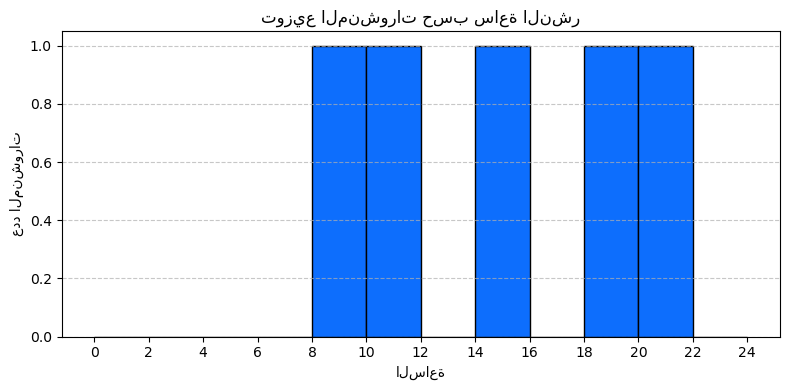

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# بيانات تجريبية تمثل منشورات فيسبوك
data = [
    {"message": "عرض الصيف", "created_time": "2024-06-01T10:00:00"},
    {"message": "نصيحة تسويقية", "created_time": "2024-06-01T18:30:00"},
    {"message": "شكر للمتابعين", "created_time": "2024-06-03T14:15:00"},
    {"message": "خصم تصميم شعار", "created_time": "2024-06-05T09:45:00"},
    {"message": "كيف تبدأ مشروعك", "created_time": "2024-06-06T20:00:00"},
]

df = pd.DataFrame(data)
df['created_time'] = pd.to_datetime(df['created_time'])
df['hour'] = df['created_time'].dt.hour
df['day'] = df['created_time'].dt.day_name()

# تحليل توزيع الأوقات
plt.figure(figsize=(8, 4))
plt.hist(df['hour'], bins=range(0, 25, 2), edgecolor='black', color='#0d6efd')
plt.title("توزيع المنشورات حسب ساعة النشر")
plt.xlabel("الساعة")
plt.ylabel("عدد المنشورات")
plt.xticks(range(0, 25, 2))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipykernel_85524/174641603.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


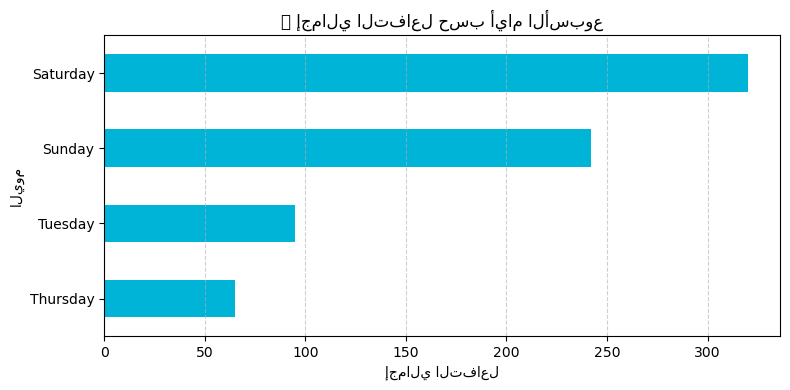

/tmp/ipykernel_85524/174641603.py:35: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


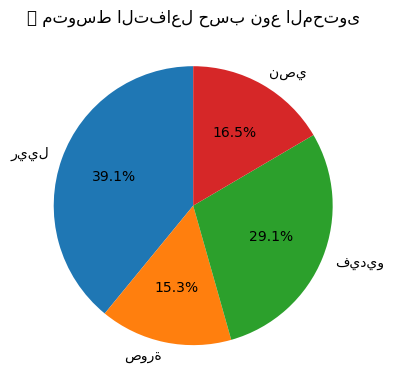

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# بيانات منشورات تم إدخالها يدويًا
data = [
    {"date": "2024-06-01", "type": "نصي", "likes": 120, "comments": 15, "shares": 5},
    {"date": "2024-06-02", "type": "رييل", "likes": 200, "comments": 30, "shares": 12},
    {"date": "2024-06-04", "type": "صورة", "likes": 85, "comments": 8, "shares": 2},
    {"date": "2024-06-06", "type": "نصي", "likes": 60, "comments": 4, "shares": 1},
    {"date": "2024-06-08", "type": "فيديو", "likes": 150, "comments": 20, "shares": 10},
]

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day_name()

# مجموع التفاعل
df['total_engagement'] = df['likes'] + df['comments'] + df['shares']

# تحليل التفاعل حسب اليوم
plt.figure(figsize=(8,4))
df.groupby('day')['total_engagement'].sum().sort_values().plot(kind='barh', color='#00b4d8')
plt.title('📊 إجمالي التفاعل حسب أيام الأسبوع')
plt.xlabel('إجمالي التفاعل')
plt.ylabel('اليوم')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# تحليل نوع المحتوى
plt.figure(figsize=(6,4))
df.groupby('type')['total_engagement'].mean().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("🔎 متوسط التفاعل حسب نوع المحتوى")
plt.ylabel('')
plt.tight_layout()
plt.show()


In [29]:
from PIL import Image, ImageDraw
import segno

# 1. إعداد بيانات QR
url = "https://www.facebook.com/profile.php?id=61574045938687"
qr = segno.make(url)

# 2. حفظ QR مؤقتًا كصورة شفافة
qr.save("qr_temp.png", scale=10, border=4, kind='png', dark='black', light='white')

# 3. فتح QR والخلفية
qr_img = Image.open("qr_temp.png").convert("RGBA")

# 4. فتح خلفية: شعار كبير أسفل QR
background = Image.open(r"\\wsl.localhost\Ubuntu\home\ali\0_gh_repos\Product_Store\MrPizzaHut\Campaign_XL_Offer\assets\brand\logo_pizzahot_norepeat_clean.png").convert("RGBA")
background = background.resize((qr_img.size[0] * 2, qr_img.size[1] * 2))

# 5. لصق QR في المنتصف
qr_pos = (
    (background.width - qr_img.width) // 2,
    (background.height - qr_img.height) // 2
)
background.paste(qr_img, qr_pos, qr_img)

# 6. إدراج لوجو صغير في المنتصف
logo = Image.open(r"\\wsl.localhost\Ubuntu\home\ali\0_gh_repos\Product_Store\MrPizzaHut\Campaign_XL_Offer\assets\brand\logo_pizzahot_chefstyle.png").convert("RGBA")
logo_size = qr_img.size[0] // 3
logo = logo.resize((logo_size, logo_size))
logo_pos = (
    qr_pos[0] + (qr_img.width - logo.width) // 2,
    qr_pos[1] + (qr_img.height - logo.height) // 2
)
background.paste(logo, logo_pos, logo)

# 7. حفظ الناتج
background.save("qr_pizzahot_final.png")



FileNotFoundError: [Errno 2] No such file or directory: '\\\\wsl.localhost\\Ubuntu\\home\\ali\\0_gh_repos\\Product_Store\\MrPizzaHut\\Campaign_XL_Offer\\assets\\brand\\logo_pizzahot_norepeat_clean.png'

In [30]:
import segno

# 1. رابط الصفحة المراد توليد QR له
url = "https://www.facebook.com/profile.php?id=61574045938687"

# 2. إنشاء الكائن باستخدام مكتبة segno عالية الجودة
qr = segno.make(url)

# 3. مسار الحفظ داخل WSL (بصيغة Linux العادية)
output_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot.png"

# 4. حفظ الصورة بجودة عالية (scale=10) وخلفية بيضاء
qr.save(output_path, scale=10, border=4, kind='png', dark='black', light='white')

print("✅ تم إنشاء QR Code وتخزينه بنجاح في:")
print(output_path)


✅ تم إنشاء QR Code وتخزينه بنجاح في:
/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot.png


In [31]:
from PIL import Image
import segno

# 1. إعداد الرابط
url = "https://www.facebook.com/profile.php?id=61574045938687"

# 2. توليد QR بجودة عالية مؤقتًا
qr = segno.make(url)
qr_path = "qr_temp.png"
qr.save(qr_path, scale=10, border=4)

# 3. تحميل الصور
qr_img = Image.open(qr_path).convert("RGBA")

background = Image.open("/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_pizzahot_norepeat_clean.png").convert("RGBA")
logo = Image.open("/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_pizzahot_chefstyle.png").convert("RGBA")

# 4. تحجيم الخلفية لتكون ضعف QR
bg_size = (qr_img.width * 2, qr_img.height * 2)
background = background.resize(bg_size)

# 5. لصق QR في المنتصف
qr_pos = ((bg_size[0] - qr_img.width) // 2, (bg_size[1] - qr_img.height) // 2)
background.paste(qr_img, qr_pos, qr_img)

# 6. لصق اللوجو في منتصف QR
logo_size = qr_img.width // 3
logo = logo.resize((logo_size, logo_size))
logo_pos = (
    qr_pos[0] + (qr_img.width - logo.width) // 2,
    qr_pos[1] + (qr_img.height - logo.height) // 2
)
background.paste(logo, logo_pos, logo)

# 7. حفظ الناتج كنسخة جديدة بجوار الأصل
output_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v2.png"
background.save(output_path)

print("✅ تم إنشاء النسخة رقم 2 بنجاح:")
print(output_path)


✅ تم إنشاء النسخة رقم 2 بنجاح:
/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v2.png


In [32]:
from PIL import Image, ImageDraw
import segno

# 1. إعداد الرابط
url = "https://www.facebook.com/profile.php?id=61574045938687"
qr = segno.make(url)

# 2. توليد QR مؤقتًا
qr.save("qr_temp.png", scale=10, border=4)
qr_img = Image.open("qr_temp.png").convert("RGBA")

# 3. تحميل الشعارين
logo_center = Image.open("/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_pizzahot_chefstyle.png").convert("RGBA")
footer_img = Image.open("/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_pizzahot_norepeat_clean.png").convert("RGBA")

# 4. إعداد مساحة التصميم (أعلى + QR + تذييل)
qr_size = qr_img.size[0]
margin = qr_size // 6
footer_height = qr_size // 3

canvas_width = qr_size + 2 * margin
canvas_height = qr_size + footer_height + 2 * margin

canvas = Image.new("RGBA", (canvas_width, canvas_height), "white")

# 5. لصق QR في المنتصف الأعلى
qr_pos = (margin, margin)
canvas.paste(qr_img, qr_pos, qr_img)

# 6. لصق الشعار في وسط QR
logo_size = qr_size // 3
logo = logo_center.resize((logo_size, logo_size))
logo_pos = (margin + (qr_size - logo_size) // 2, margin + (qr_size - logo_size) // 2)
canvas.paste(logo, logo_pos, logo)

# 7. لصق الشعار السفلي (التذييل)
footer_resized = footer_img.resize((qr_size, footer_height))
footer_pos = (margin, qr_size + margin)
canvas.paste(footer_resized, footer_pos, footer_resized)

# 8. إضافة إطار خارجي
draw = ImageDraw.Draw(canvas)
frame_margin = 6
draw.rectangle(
    [(frame_margin, frame_margin), (canvas_width - frame_margin, canvas_height - frame_margin)],
    outline=(30, 30, 30), width=4
)

# 9. الحفظ
output_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v3.png"
canvas.save(output_path)

print("✅ تم إنشاء النسخة v3 بنجاح:")
print(output_path)


✅ تم إنشاء النسخة v3 بنجاح:
/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v3.png


In [33]:
import segno
from PIL import Image, ImageDraw, ImageEnhance

# 1. إعداد الرابط الحقيقي للمسح
facebook_url = "https://www.facebook.com/profile.php?id=61574045938687"
qr = segno.make(facebook_url)

# 2. توليد QR مؤقت بصيغة PNG مع خلفية شفافة
qr_path = "qr_temp.png"
qr.save(qr_path, scale=10, border=4)

qr_img = Image.open(qr_path).convert("RGBA")

# 3. تحميل الخلفية الريفية من المسار
background = Image.open("/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/images/rustic_pizza_ingredients.jpg").convert("RGBA")
bg_w, bg_h = background.size

# 4. إعادة تحجيم QR ليكون بنسبة 40% من عرض الخلفية
qr_size = int(bg_w * 0.4)
qr_img = qr_img.resize((qr_size, qr_size), Image.LANCZOS)

# 5. تحميل شعار المنتصف (مع تحسين الألوان ليصبح خشبيًا)
logo_center = Image.open("/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_center_pizzahot.jpg").convert("RGBA")
logo_center = logo_center.resize((qr_size // 3, qr_size // 3), Image.LANCZOS)

# تحويل ألوان الشعار إلى نغمة خشبية دافئة
r, g, b, a = logo_center.split()
r = r.point(lambda i: min(i + 30, 255))
g = g.point(lambda i: int(i * 0.85))
b = b.point(lambda i: int(i * 0.6))
logo_wood = Image.merge("RGBA", (r, g, b, a))

# 6. تحميل شعار التذييل
footer_logo = Image.open("/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_pizzahot_norepeat_clean.png").convert("RGBA")

# 7. نسخ الخلفية وإنشاء إطار
canvas = background.copy()
draw = ImageDraw.Draw(canvas)

# إعداد موقع الـ QR
qr_x = (bg_w - qr_size) // 2
qr_y = int(bg_h * 0.25)  # نرفعه قليلًا للأعلى لترك مساحة لأسفل

# لصق QR
canvas.paste(qr_img, (qr_x, qr_y), qr_img)

# لصق اللوجو في المنتصف
logo_pos = (
    qr_x + (qr_size - logo_wood.width) // 2,
    qr_y + (qr_size - logo_wood.height) // 2
)
canvas.paste(logo_wood, logo_pos, logo_wood)

# لصق التذييل أسفل QR
footer_size = (qr_size, int(qr_size * 0.3))
footer_resized = footer_logo.resize(footer_size, Image.LANCZOS)
footer_pos = (
    (bg_w - footer_size[0]) // 2,
    qr_y + qr_size + 10
)
canvas.paste(footer_resized, footer_pos, footer_resized)

# رسم إطار حول QR
frame_margin = 8
frame_rect = [
    qr_x - frame_margin,
    qr_y - frame_margin,
    qr_x + qr_size + frame_margin,
    qr_y + qr_size + frame_margin
]
draw.rectangle(frame_rect, outline=(80, 50, 30, 180), width=4)

# 8. حفظ النسخة النهائية بإصدار جديد
output_final = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v4.png"
canvas.save(output_final)

print("✅ تم إنشاء QR قابل للمسح مع تصميم فني وحفظه في:")
print(output_final)


✅ تم إنشاء QR قابل للمسح مع تصميم فني وحفظه في:
/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v4.png


In [34]:
from PIL import Image, ImageDraw
import segno

# 1. إعداد الرابط
url = "https://www.facebook.com/profile.php?id=61574045938687"
qr = segno.make(url)

# 2. توليد QR مؤقتًا
qr.save("qr_temp.png", scale=10, border=4)
qr_img = Image.open("qr_temp.png").convert("RGBA")

# 3. تحميل الشعارين
logo_center = Image.open("/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_pizzahot_chefstyle.png").convert("RGBA")
footer_img = Image.open("/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_pizzahot_norepeat_clean.png").convert("RGBA")

# 4. إعداد مساحة التصميم (أعلى + QR + تذييل)
qr_size = qr_img.size[0]
margin = qr_size // 6
footer_height = qr_size // 3

canvas_width = qr_size + 2 * margin
canvas_height = qr_size + footer_height + 2 * margin

canvas = Image.new("RGBA", (canvas_width, canvas_height), "white")

# 5. لصق QR في المنتصف الأعلى
qr_pos = (margin, margin)
canvas.paste(qr_img, qr_pos, qr_img)

# 6. لصق الشعار في وسط QR
logo_size = qr_size // 3
logo = logo_center.resize((logo_size, logo_size))
logo_pos = (margin + (qr_size - logo_size) // 2, margin + (qr_size - logo_size) // 2)
canvas.paste(logo, logo_pos, logo)

# 7. لصق الشعار السفلي (التذييل)
footer_resized = footer_img.resize((qr_size, footer_height))
footer_pos = (margin, qr_size + margin)
canvas.paste(footer_resized, footer_pos, footer_resized)

# 8. إضافة إطار خارجي
draw = ImageDraw.Draw(canvas)
frame_margin = 6
draw.rectangle(
    [(frame_margin, frame_margin), (canvas_width - frame_margin, canvas_height - frame_margin)],
    outline=(30, 30, 30), width=4
)

# 9. الحفظ
output_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v3.png"
canvas.save(output_path)

print("✅ تم إنشاء النسخة v3 بنجاح:")
print(output_path)


✅ تم إنشاء النسخة v3 بنجاح:
/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v3.png


In [35]:
import segno
from PIL import Image, ImageDraw, ImageEnhance

# 1. إعداد الرابط الحقيقي للمسح
facebook_url = "https://www.facebook.com/profile.php?id=61574045938687"
qr = segno.make(facebook_url)

# 2. توليد QR مؤقت بصيغة PNG مع خلفية شفافة
qr_path = "qr_temp.png"
qr.save(qr_path, scale=10, border=4)

qr_img = Image.open(qr_path).convert("RGBA")

# 3. تحميل الخلفية الريفية من المسار
background = Image.open("/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/images/rustic_pizza_ingredients.jpg").convert("RGBA")
bg_w, bg_h = background.size

# 4. إعادة تحجيم QR ليكون بنسبة 40% من عرض الخلفية
qr_size = int(bg_w * 0.4)
qr_img = qr_img.resize((qr_size, qr_size), Image.LANCZOS)

# 5. تحميل شعار المنتصف (مع تحسين الألوان ليصبح خشبيًا)
logo_center = Image.open("/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_center_pizzahot.jpg").convert("RGBA")
logo_center = logo_center.resize((qr_size // 3, qr_size // 3), Image.LANCZOS)

# تحويل ألوان الشعار إلى نغمة خشبية دافئة
r, g, b, a = logo_center.split()
r = r.point(lambda i: min(i + 30, 255))
g = g.point(lambda i: int(i * 0.85))
b = b.point(lambda i: int(i * 0.6))
logo_wood = Image.merge("RGBA", (r, g, b, a))

# 6. تحميل شعار التذييل
footer_logo = Image.open("/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_pizzahot_norepeat_clean.png").convert("RGBA")

# 7. نسخ الخلفية وإنشاء إطار
canvas = background.copy()
draw = ImageDraw.Draw(canvas)

# إعداد موقع الـ QR
qr_x = (bg_w - qr_size) // 2
qr_y = int(bg_h * 0.25)  # نرفعه قليلًا للأعلى لترك مساحة لأسفل

# لصق QR
canvas.paste(qr_img, (qr_x, qr_y), qr_img)

# لصق اللوجو في المنتصف
logo_pos = (
    qr_x + (qr_size - logo_wood.width) // 2,
    qr_y + (qr_size - logo_wood.height) // 2
)
canvas.paste(logo_wood, logo_pos, logo_wood)

# لصق التذييل أسفل QR
footer_size = (qr_size, int(qr_size * 0.3))
footer_resized = footer_logo.resize(footer_size, Image.LANCZOS)
footer_pos = (
    (bg_w - footer_size[0]) // 2,
    qr_y + qr_size + 10
)
canvas.paste(footer_resized, footer_pos, footer_resized)

# رسم إطار حول QR
frame_margin = 8
frame_rect = [
    qr_x - frame_margin,
    qr_y - frame_margin,
    qr_x + qr_size + frame_margin,
    qr_y + qr_size + frame_margin
]
draw.rectangle(frame_rect, outline=(80, 50, 30, 180), width=4)

# 8. حفظ النسخة النهائية بإصدار جديد
output_final = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v4.png"
canvas.save(output_final)

print("✅ تم إنشاء QR قابل للمسح مع تصميم فني وحفظه في:")
print(output_final)


✅ تم إنشاء QR قابل للمسح مع تصميم فني وحفظه في:
/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v4.png


In [36]:
import segno
from PIL import Image, ImageDraw

# 1. توليد QR حقيقي قابل للمسح
facebook_url = "https://www.facebook.com/profile.php?id=61574045938687"
qr = segno.make(facebook_url)
qr.save("qr_temp.png", scale=10, border=4)
qr_img = Image.open("qr_temp.png").convert("RGBA")

# 2. تحميل الخلفية الريفية
bg_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/images/rustic_pizza_ingredients.jpg"
background = Image.open(bg_path).convert("RGBA")
bg_w, bg_h = background.size

# 3. تغيير حجم QR ليكون في المنتصف
qr_size = int(bg_w * 0.4)
qr_img = qr_img.resize((qr_size, qr_size), Image.LANCZOS)

# 4. تحميل الشعار الأوسط وتلوينه بنغمة خشبية
logo_center_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_center_pizzahot.jpg"
logo_center = Image.open(logo_center_path).convert("RGBA")
logo_center = logo_center.resize((qr_size // 3, qr_size // 3), Image.LANCZOS)

r, g, b, a = logo_center.split()
r = r.point(lambda i: min(i + 30, 255))
g = g.point(lambda i: int(i * 0.85))
b = b.point(lambda i: int(i * 0.6))
logo_wood = Image.merge("RGBA", (r, g, b, a))

# 5. تحميل الشعار السفلي
footer_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_pizzahot_norepeat_clean.png"
footer_logo = Image.open(footer_path).convert("RGBA")
footer_size = (qr_size, int(qr_size * 0.3))
footer_logo = footer_logo.resize(footer_size, Image.LANCZOS)

# 6. تجهيز لوحة التصميم النهائية
canvas = background.copy()
draw = ImageDraw.Draw(canvas)

# موضع QR
qr_x = (bg_w - qr_size) // 2
qr_y = int(bg_h * 0.25)
canvas.paste(qr_img, (qr_x, qr_y), qr_img)

# موضع الشعار الأوسط
logo_pos = (
    qr_x + (qr_size - logo_wood.width) // 2,
    qr_y + (qr_size - logo_wood.height) // 2
)
canvas.paste(logo_wood, logo_pos, logo_wood)

# موضع الشعار السفلي
footer_pos = (
    (bg_w - footer_size[0]) // 2,
    qr_y + qr_size + 10
)
canvas.paste(footer_logo, footer_pos, footer_logo)

# 7. إطار حول QR
frame_margin = 10
frame_rect = [
    qr_x - frame_margin,
    qr_y - frame_margin,
    qr_x + qr_size + frame_margin,
    qr_y + qr_size + frame_margin
]
draw.rectangle(frame_rect, outline=(65, 40, 20, 200), width=5)

# 8. حفظ النسخة النهائية
output_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v4.png"
canvas.save(output_path)

print("✅ تم إنشاء QR حقيقي مع تصميم متكامل وحفظه في:")
print(output_path)


✅ تم إنشاء QR حقيقي مع تصميم متكامل وحفظه في:
/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v4.png


In [41]:
from PIL import Image

# مسار الصورة الأصلية JPEG
input_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/raw_images/decor_splash_coffee_curve.jpeg"

# مسار الصورة الجديدة PNG
output_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/decor/decor_splash_coffee_curve.png"

# فتح الصورة الأصلية
image = Image.open(input_path).convert("RGBA")

# حفظ الصورة كـ PNG
image.save(output_path, "PNG")

print(" تم تحويل الصورة إلى PNG بنجاح!")


 تم تحويل الصورة إلى PNG بنجاح!


In [38]:
!mkdir -p /home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/decor/


In [39]:
from PIL import Image
import os

# مسار الإدخال
input_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/raw_images/decor_splash_coffee_curve.jpeg"

# مسار الإخراج
output_dir = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/decor/"
output_filename = "decor_splash_coffee_curve.png"
output_path = os.path.join(output_dir, output_filename)

# إنشاء المجلد إذا لم يكن موجودًا
os.makedirs(output_dir, exist_ok=True)

# التحويل والحفظ
image = Image.open(input_path).convert("RGBA")
image.save(output_path, "PNG")

print(f"✅ تم تحويل الصورة إلى PNG وحفظها هنا:\n{output_path}")


✅ تم تحويل الصورة إلى PNG وحفظها هنا:
/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/decor/decor_splash_coffee_curve.png


In [40]:
import segno
from PIL import Image

# 1. توليد QR قابل للمسح
qr = segno.make("https://www.facebook.com/profile.php?id=61574045938687")
qr.save("qr_temp_v5.png", scale=10, border=4)
qr_img = Image.open("qr_temp_v5.png").convert("RGBA")

# 2. تحميل الشعار الأوسط
logo_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/brand/logo_center_pizzahot.jpg"
logo = Image.open(logo_path).convert("RGBA")

# 3. تنسيق لوني خشبي (زيادة دفء وتخفيف الأزرق)
r, g, b, a = logo.split()
r = r.point(lambda i: min(i + 30, 255))      # دفء أحمر
g = g.point(lambda i: int(i * 0.85))         # تخفيف أخضر
b = b.point(lambda i: int(i * 0.6))          # إزاحة أزرق
logo_wood = Image.merge("RGBA", (r, g, b, a))

# 4. تغيير حجم الشعار ليتناسب مع وسط الباركود
qr_w, qr_h = qr_img.size
logo_size = int(qr_w * 0.3)
logo_wood = logo_wood.resize((logo_size, logo_size), Image.LANCZOS)

# 5. دمج الشعار داخل الـ QR
qr_img.paste(logo_wood, ((qr_w - logo_size)//2, (qr_h - logo_size)//2), logo_wood)

# 6. حفظ النسخة النهائية
output_path = "/home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v5.png"
qr_img.save(output_path)

print(f"✅ تم إنشاء QR بنجاح: {output_path}")


✅ تم إنشاء QR بنجاح: /home/ali/0_gh_repos/Product_Store/MrPizzaHut/Campaign_XL_Offer/assets/qrcodes/qr_facebook_pizzahot_v5.png


In [42]:
<!DOCTYPE html>
<html lang="ar" dir="rtl">
<head>
  <meta charset="UTF-8" />
  <title>MrPizzaHut – الصفحة الرئيسية</title>
  <link href="https://fonts.googleapis.com/css2?family=Tajawal:wght@400;700;900&display=swap" rel="stylesheet">
  <style>
    body {
      margin: 0;
      font-family: 'Tajawal', sans-serif;
      background: url('assets/images/wood_leaf_bg.jpg') no-repeat center center fixed;
      background-size: cover;
      color: #fff;
      scroll-behavior: smooth;
    }
    header {
      position: fixed;
      top: 0;
      width: 100%;
      background: rgba(0, 0, 0, 0.8);
      padding: 12px 0;
      text-align: center;
      z-index: 1000;
      border-bottom: 1px solid #444;
    }
    header a {
      color: #ffd700;
      margin: 0 15px;
      font-size: 1.2em;
      font-weight: bold;
      text-decoration: none;
    }
    header a:hover {
      color: #fff;
    }
    .hero {
      padding-top: 100px;
      text-align: center;
    }
    .hero h1 {
      font-size: 3em;
      color: #ffd700;
      margin-bottom: 10px;
    }
    .hero p {
      font-size: 1.2em;
      margin-bottom: 20px;
    }
    .buttons {
      margin-top: 30px;
      display: flex;
      flex-wrap: wrap;
      justify-content: center;
      gap: 20px;
    }
    .buttons a {
      background: #ffd700;
      color: #000;
      padding: 12px 24px;
      text-decoration: none;
      border-radius: 8px;
      font-weight: bold;
      font-size: 1.1em;
      box-shadow: 0 2px 6px rgba(0,0,0,0.3);
    }
    .section {
      margin-top: 60px;
      text-align: center;
      padding: 20px;
    }
    .section h2 {
      font-size: 2em;
      color: #00e676;
      margin-bottom: 20px;
    }
    .footer {
      text-align: center;
      padding: 40px 10px;
      font-size: 0.9em;
      color: #aaa;
      border-top: 1px solid #444;
      margin-top: 60px;
    }
    @media (max-width: 768px) {
      .hero h1 { font-size: 2em; }
      header a { font-size: 1em; margin: 0 8px; }
    }
  </style>
</head>
<body>

  <header>
    <a href="index.html">🏠 الرئيسية</a>
    <a href="promo_offer.html">📢 عرض الحجم العائلي</a>
    <a href="store.html">🛒 المتجر</a>
    <a href="https://www.facebook.com/profile.php?id=61574045938687" target="_blank">📘 فيسبوك</a>
    <a href="https://wa.me/972569787731" target="_blank">💬 واتساب</a>
  </header>

  <div class="hero">
    <h1>مرحبًا بكم في MrPizzaHut</h1>
    <p>عالم البيتزا والنكهات الطازجة – عروض حصرية في انتظارك!</p>

    <div class="buttons">
      <a href="promo_offer.html">🍕 اكتشف عرض الحجم العائلي</a>
      <a href="store.html">🛍️ تصفح قائمة المأكولات</a>
      <a href="https://wa.me/972569787731" target="_blank">📲 اطلب عبر واتساب</a>
    </div>
  </div>

  <div class="section">
    <h2>لماذا MrPizzaHut؟</h2>
    <p>✔️ مكونات طازجة<br>✔️ خبز يومي طازج<br>✔️ عروض مشوقة كل أسبوع<br>✔️ توصيل سريع وآمن</p>
  </div>

  <div class="footer">
    بلعين – شارع صفا – رام الله<br>
    للحجز والتوصيل: <a href="tel:0097256988731" style="color:#25d366;">0097256988731</a><br>
    &copy; 2025 MrPizzaHut
  </div>

</body>
</html>


SyntaxError: invalid character '–' (U+2013) (4155024337.py, line 5)

In [43]:
<!DOCTYPE html>
<html lang="ar" dir="rtl">
<head>
  <meta charset="UTF-8" />
  <title>قائمة الطعام – MrPizzaHut</title>
  <link href="https://fonts.googleapis.com/css2?family=Tajawal:wght@400;700&display=swap" rel="stylesheet">
  <style>
    body {
      margin: 0;
      font-family: 'Tajawal', sans-serif;
      background: url('assets/images/rustic_pizza_ingredients.jpg') no-repeat center center fixed;
      background-size: cover;
      color: #fff;
      scroll-behavior: smooth;
    }
    header {
      position: fixed;
      top: 0;
      width: 100%;
      background-color: rgba(0,0,0,0.85);
      display: flex;
      justify-content: center;
      padding: 10px 0;
      z-index: 1000;
      border-bottom: 1px solid #444;
    }
    header a {
      color: #ffd700;
      text-decoration: none;
      margin: 0 15px;
      font-size: 1.1em;
      font-weight: bold;
    }
    header a:hover {
      color: #fff;
    }
    .overlay {
      background: rgba(0,0,0,0.7);
      padding-top: 80px;
      padding-bottom: 60px;
      min-height: 100vh;
    }
    h1 {
      text-align: center;
      font-size: 2.5em;
      color: #ffd700;
      margin-bottom: 30px;
    }
    .menu-grid {
      display: grid;
      grid-template-columns: repeat(auto-fill, minmax(250px, 1fr));
      gap: 20px;
      padding: 0 30px;
    }
    .item {
      background: rgba(255, 255, 255, 0.1);
      border-radius: 12px;
      padding: 15px;
      text-align: center;
      box-shadow: 0 0 10px rgba(0,0,0,0.5);
    }
    .item img {
      width: 100%;
      border-radius: 10px;
      margin-bottom: 10px;
    }
    .item h3 {
      margin: 10px 0;
      font-size: 1.3em;
      color: #fff;
    }
    .price {
      color: #00e676;
      font-weight: bold;
      margin-bottom: 10px;
      font-size: 1.2em;
    }
    .order-btn {
      background: #ffd700;
      color: #000;
      padding: 8px 16px;
      border-radius: 6px;
      text-decoration: none;
      font-weight: bold;
      display: inline-block;
    }
    .order-btn:hover {
      background: #fff099;
    }
    .footer {
      text-align: center;
      margin-top: 50px;
      font-size: 0.9em;
      color: #aaa;
    }
    @media (max-width: 768px) {
      header a { font-size: 0.95em; margin: 0 8px; }
      h1 { font-size: 2em; }
    }
  </style>
</head>
<body>

  <header>
    <a href="index.html">🏠 الرئيسية</a>
    <a href="promo_offer.html">📢 عرضنا</a>
    <a href="store.html">🛒 المتجر</a>
    <a href="https://www.facebook.com/profile.php?id=61574045938687" target="_blank">📘 فيسبوك</a>
  </header>

  <div class="overlay">
    <h1>🍽️ قائمة MrPizzaHut</h1>

    <div class="menu-grid">

      <div class="item">
        <img src="assets/images/pizza_closeup_main.png" alt="بيتزا XL">
        <h3>بيتزا الحجم العائلي (XL)</h3>
        <div class="price">60 شيكل</div>
        <a class="order-btn" href="https://wa.me/972569787731" target="_blank">اطلب الآن</a>
      </div>

      <div class="item">
        <img src="assets/images/pizza_deluxe_plate.jpg" alt="بيتزا ديلوكس">
        <h3>بيتزا ديلوكس بالدجاج</h3>
        <div class="price">70 شيكل</div>
        <a class="order-btn" href="https://wa.me/972569787731" target="_blank">اطلب الآن</a>
      </div>

      <div class="item">
        <img src="assets/images/french_fries_main.jpg" alt="بطاطا مقلية">
        <h3>بطاطا مقلية كبيرة</h3>
        <div class="price">10 شيكل</div>
        <a class="order-btn" href="https://wa.me/972569787731" target="_blank">اطلب الآن</a>
      </div>

      <div class="item">
        <img src="assets/images/coke_glass_ice.png" alt="مشروب كولا">
        <h3>كولا 1.25L</h3>
        <div class="price">6 شيكل</div>
        <a class="order-btn" href="https://wa.me/972569787731" target="_blank">اطلب الآن</a>
      </div>

    </div>

    <div class="footer">
      بلعين – شارع صفا – رام الله<br>
      &copy; 2025 MrPizzaHut
    </div>
  </div>

</body>
</html>


SyntaxError: invalid character '–' (U+2013) (3670065744.py, line 5)